In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [9]:
x_train.shape


(60000, 28, 28)

In [13]:
x_test.shape

(10000, 28, 28)

In [15]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

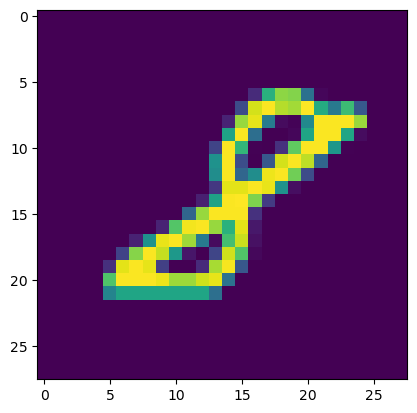

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1009])

In [23]:
x_train=x_train/255
x_test=x_test/255

In [25]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [29]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam')

In [59]:
model.fit(x_train,y_train,epochs=35,validation_split=0.2)

Epoch 1/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.4092e-06 - val_loss: 0.2571
Epoch 2/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.1250e-06 - val_loss: 0.2564
Epoch 3/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.2659e-06 - val_loss: 0.2554
Epoch 4/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.5192e-07 - val_loss: 0.2541
Epoch 5/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 5.5449e-07 - val_loss: 0.2536
Epoch 6/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.6318e-07 - val_loss: 0.2520
Epoch 7/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.2945e-07 - val_loss: 0.2527
Epoch 8/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.4652e-07 - val_loss: 0.2523
Epoch 9/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0774e-07 - val_loss: 0.2545
Epoch 10/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.2307e-08 - val_loss: 0.2545
Epoch 11/35
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0054 - val_los

In [69]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [71]:
ypred=y_pred.argmax(axis=1)

In [73]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,ypred)

0.9803